In [9]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('twitter_training.csv')

In [13]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [14]:
col_names=['ID','Entity','sentiments','contest']
df=pd.read_csv('twitter_training.csv',names=col_names)

In [15]:
df.head()

,ID,Entity,sentiments,contest
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [16]:
df.shape

(74682, 4)

In [17]:
df.describe

<bound method NDFrame.describe of          ID       Entity sentiments  \
0      2401  Borderlands   Positive   
1      2401  Borderlands   Positive   
2      2401  Borderlands   Positive   
3      2401  Borderlands   Positive   
4      2401  Borderlands   Positive   
...     ...          ...        ...   
74677  9200       Nvidia   Positive   
74678  9200       Nvidia   Positive   
74679  9200       Nvidia   Positive   
74680  9200       Nvidia   Positive   
74681  9200       Nvidia   Positive   

                                                 contest  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that

In [18]:
df.isnull().sum()

ID              0
Entity          0
sentiments      0
contest       686
dtype: int64

In [19]:
df.dropna(axis=0,inplace=True)

In [20]:
df.isnull().sum()

ID            0
Entity        0
sentiments    0
contest       0
dtype: int64

In [22]:
df.duplicated().sum()

np.int64(2340)

In [23]:
df.drop_duplicates(inplace=True)
df.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
74677    False
74678    False
74679    False
74680    False
74681    False
Length: 71656, dtype: bool>

In [24]:
df.shape

(71656, 4)

In [27]:
sentiment_counts=df['sentiments'].value_counts()
sentiment_counts

sentiments
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

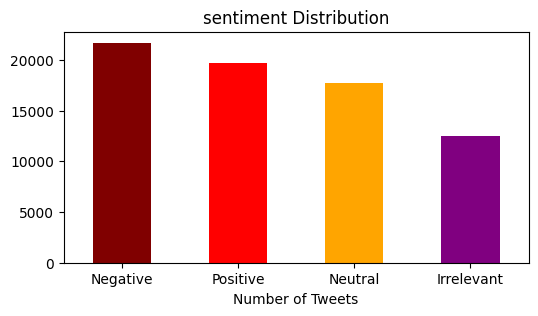

In [34]:
plt.figure(figsize=(6,3))
sentiment_counts.plot(kind='bar',color=['maroon','red','orange','purple'])
plt.title('sentiment Distribution')
plt.xlabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [41]:
brand_data=df[df['Entity'].str.contains('Microsoft',case=False)]
brand_sentiment_counts=brand_data['sentiments'].value_counts()
brand_sentiment_counts

sentiments
Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: count, dtype: int64

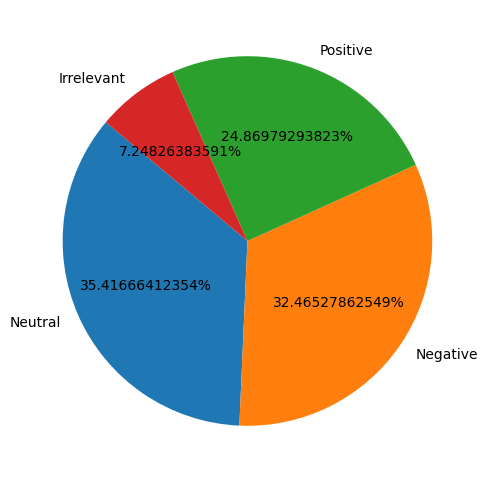

In [43]:
plt.figure(figsize=(6,6))
plt.pie(brand_sentiment_counts,labels=brand_sentiment_counts.index,autopct='%1.11f%%',startangle=140)
plt.show()       